<a href="https://colab.research.google.com/github/yelenana/machine_learning/blob/main/Rybchynska_Olena_HW_2_1_%D0%9B%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F_%D0%B2%D1%96%D0%B4_%D0%B1%D0%B0%D0%B3%D0%B0%D1%82%D1%8C%D0%BE%D1%85_%D0%B7%D0%BC%D1%96%D0%BD%D0%BD%D0%B8%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [73]:
from google.colab import drive
drive.mount('/content/drive')
!ls drive/MyDrive/ML/2_1/


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cars.csv  medical-charges.csv


# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [74]:
import pandas as pd
df=pd.read_csv('drive/MyDrive/ML/2_1/cars.csv')
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [75]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
?pd.DataFrame.info



---
Виконання завдання:

Переглянемо загальну інформацію про дані в таблиці, типи даних

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


Далі преглядаю, які і скільки є унікальних даних там де я бачу категоріальні дані, розгляну лише деякі

In [77]:
df.Brand.unique()

array(['Toyota', 'Honda', 'Ford', 'Maruti', 'Hyundai', 'Tata', 'Mahindra',
       'Volkswagen', 'Audi', 'BMW', 'Mercedes'], dtype=object)

In [78]:
df.Brand.value_counts()

,count
Brand,
Ford,11
Tata,11
Hyundai,11
BMW,10
Toyota,10
Audi,10
Volkswagen,10
Mercedes,10
Honda,6




---



In [79]:
df.Fuel_Type.unique()

array(['Petrol', 'Diesel'], dtype=object)

In [80]:
df.Fuel_Type.value_counts()

,count
Fuel_Type,
Petrol,52
Diesel,48




---



In [81]:
df.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [82]:
df.Transmission.value_counts()

,count
Transmission,
Automatic,57
Manual,43




---



In [83]:
df.Owner_Type.value_counts()

,count
Owner_Type,
First,44
Second,43
Third,13


Висновок: В наборі даних 8 числових (Car_ID, Year, Kilometers_Driven, Mileage, Engine, Power, Seats, Price) і 5 категоріальних колонок, з них:

2 бінарні (мають лише 2 значення): Fuel_Type (Petrol/Diesel)* та Transmission (Manual/Automatic).

2 мультикатегоріальні (більше 2-х значень) зі значеннями, для яких немає відношення порядку: Brand, Model, - тут доречі напрошується об'єднати цю ознаку, бо для даного прикладу модель не має смислу без бренду, адже моделі різних бренидів немає смислу порівнювати.

1 колонка, в якій можна встановити відношення порядку: Owner_Type (First < Second < Third).

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.



---
Виконання завдання:


In [84]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=12)

In [85]:
# Створюємо тренувальний і тестовий набори
input_cols = list(train_df.columns)[1:-1]
target_col = 'Price'
X_train, y_train = train_df[input_cols], train_df[target_col]
X_test, y_test = test_df[input_cols], test_df[target_col]

In [86]:
X_train.head(3)

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
83,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5
55,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5
26,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5


In [87]:
y_train.head(3)

,Price
83,1600000
55,2600000
26,3200000


In [88]:
X_test.head(3)

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
17,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5
41,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5
92,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5


In [89]:
y_test.head(3)

,Price
17,1900000
41,450000
92,650000


**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)



---
Виконання завдання:


In [90]:
df.Transmission.value_counts()

,count
Transmission,
Automatic,57
Manual,43


In [91]:
df.Fuel_Type.value_counts()

,count
Fuel_Type,
Petrol,52
Diesel,48


In [92]:
transmission_codes = {'Automatic':1,'Manual':0}

In [93]:
fuel_codes = {'Petrol':1,'Diesel':0}

In [156]:
X_train['Transmission_codes'] = X_train.Transmission.map(transmission_codes)
X_train['Fuel_codes'] = X_train.Fuel_Type.map(fuel_codes)
X_train.head(3)

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Transmission_codes,Fuel_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [157]:
X_test['Transmission_codes'] = X_test.Transmission.map(transmission_codes)
X_test['Fuel_codes']=X_test.Fuel_Type.map(fuel_codes)
X_test.head(3)

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Transmission_codes,Fuel_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [96]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(X_train[['Brand']])

OneHotEncoder()

In [97]:
one_hot = enc.transform(X_train[['Brand']]).toarray()

In [98]:
X_train[enc.categories_[0]] = one_hot

In [99]:
X_train.head(3)

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Transmission_codes,Fuel_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
83,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
55,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
one_hot_test = enc.transform(X_test[['Brand']]).toarray()

In [101]:
X_test[enc.categories_[0]] = one_hot_test
X_test

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Transmission_codes,Fuel_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
17,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
92,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
68,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,Hyundai,Elantra,2017,32000,Diesel,Automatic,Second,22,1582,126,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
89,Hyundai,Venue,2018,32000,Petrol,Manual,Third,17,1197,81,5,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
15,Honda,City,2017,42000,Diesel,Manual,Second,25,1498,98,5,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,Ford,Figo,2020,15000,Petrol,Manual,Third,18,1194,94,5,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497,113,5,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [103]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Transmission_codes,Fuel_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Transmission_codes,Fuel_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [104]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])
X_train_num.head(3)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Transmission_codes,Fuel_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,2019,22000,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,2018,28000,17,1968,187,5,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,2018,28000,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])
X_test_num.head(3)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Transmission_codes,Fuel_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,2016,38000,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,2019,26000,20,1086,68,5,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,2017,32000,18,1598,103,5,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
# 1. Об'єднуємо ознаки та цільову змінну
train_data = pd.concat([X_train_num, y_train], axis=1)

In [108]:
# 2. Розраховуємо матрицю кореляції
corr_matrix = train_data.corr()

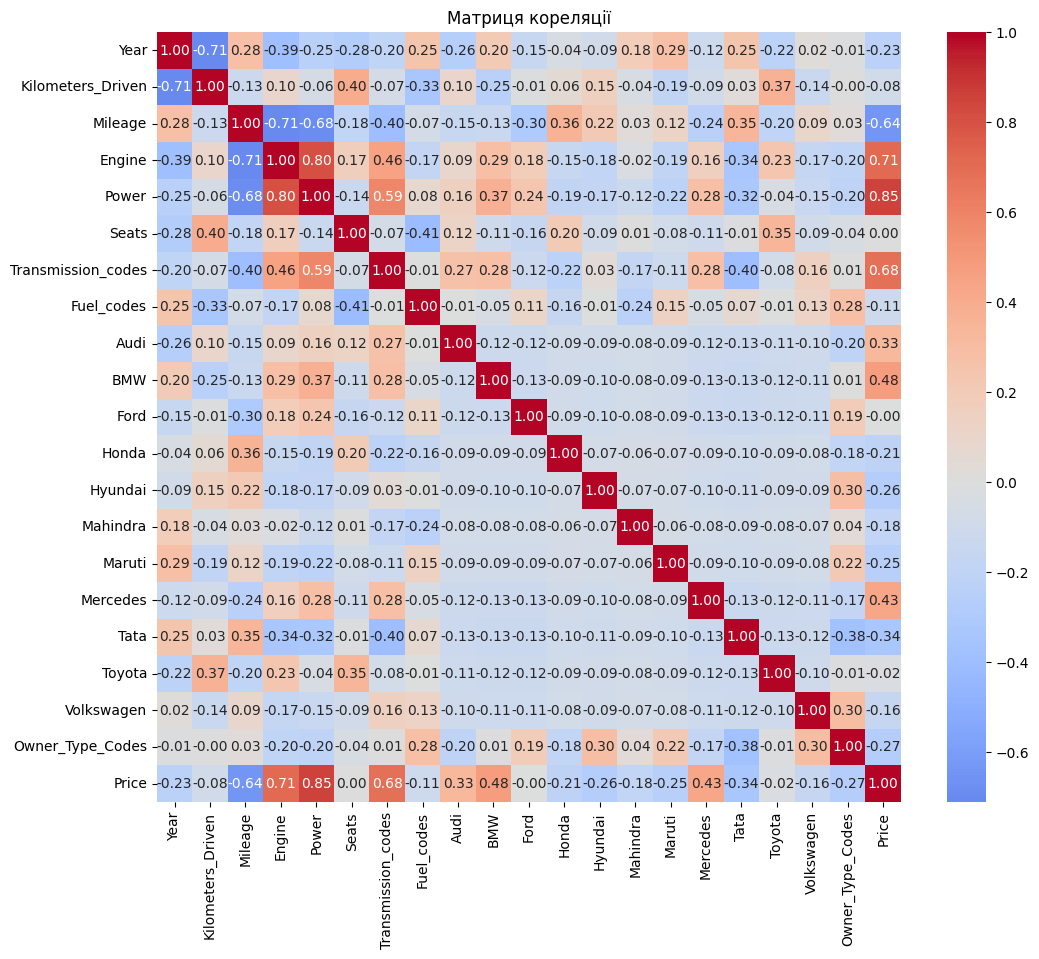

In [109]:
# 3. Візуалізація (heatmap)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Матриця кореляції")
plt.show()

**Висновок:**
На основі побудованої матриці кореляції можна зробити висновок, що найбільш значущими ознаками для прогнозування цільової змінної Price (з кореляцією понад 0.5 за модулем) є:
- Потужність (Power): Коефіцієнт $0.85$. Має найсильніший прямий вплив на ціну.
- Об'єм двигуна (Engine): Коефіцієнт $0.71$. Прямий зв'язок з вартістю.
- Тип трансмісії (Transmission_codes): Коефіцієнт $0.68$. Автоматичні коробки передач значно дорожчі за механічні.
- Економічність (Mileage): Коефіцієнт $-0.64$. Має зворотний зв'язок — потужні та дорогі авто зазвичай менш економічні.

Інші ознаки, такі як рік випуску (Year, -0.23) або конкретні бренди (наприклад, BMW, 0.48), мають вплив, але він не перевищує поріг 0.5 у межах даного датасету.

**Завдання 6**. Тренуємо лінійну регресію.

0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
inputs,targets = X_train_num, y_train
model = LinearRegression()
model.fit(inputs, targets)

LinearRegression()

In [111]:
import numpy as np
predictions_train = model.predict(inputs)
predictions_test = model.predict(X_test_num)
rmse_test = np.sqrt(mean_squared_error(y_test, predictions_test))
print('Loss:',rmse_test)

Loss: 259601.26542723525


- значення Loss доволі високе, але по одному цьому значенню важко робити висновки, варто його порівняти з середнім значенням ціни тестових значень

In [112]:
y_test.mean()

np.float64(1150000.0)

Середнє значення тестових значень значно перевищую Loss, отже Loss вже виглядає доволі помірним). Остатточний виснвок про якість моделі дозволить зробити подальниший аналіз помилок, графіків розсіювання, коефіцієнту детермінації

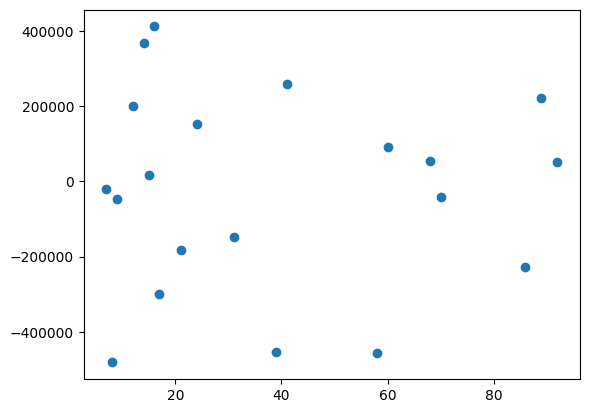

In [113]:
errors_test = y_test-predictions_test
plt.plot(errors_test,'o')


(array([3., 0., 2., 2., 2., 4., 1., 3., 1., 2.]),
 array([-481379.75606123, -392029.84331148, -302679.93056173,
        -213330.01781198, -123980.10506223,  -34630.19231248,
          54719.72043727,  144069.63318702,  233419.54593677,
         322769.45868651,  412119.37143626]),
 <BarContainer object of 10 artists>)

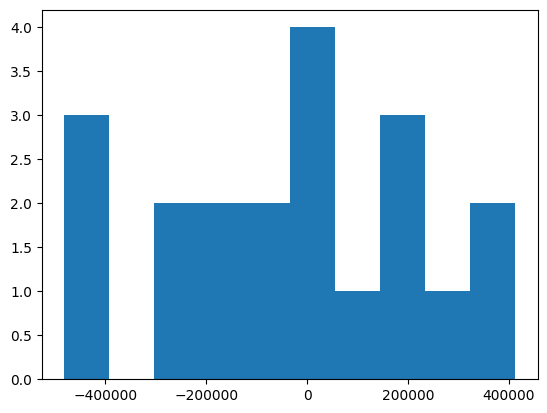

In [114]:
plt.hist(errors_test)

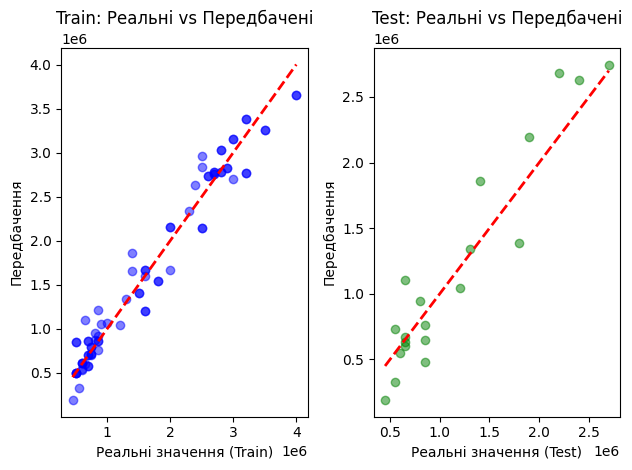

In [115]:
# Графік для тренувальних даних
plt.subplot(1, 2, 1)
plt.scatter(targets, predictions_train, alpha=0.5, color='blue')
plt.plot([targets.min(), targets.max()], [targets.min(), targets.max()], 'r--', lw=2)
plt.xlabel('Реальні значення (Train)')
plt.ylabel('Передбачення')
plt.title('Train: Реальні vs Передбачені')

# Графік для тестових даних
plt.subplot(1, 2, 2)
plt.scatter(y_test, predictions_test, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Реальні значення (Test)')
plt.ylabel('Передбачення')
plt.title('Test: Реальні vs Передбачені')

plt.tight_layout()
plt.show()

In [116]:
from sklearn.metrics import r2_score

# Розрахунок для тренувальних даних
r2_train = r2_score(targets, predictions_train)

# Розрахунок для тестових даних
r2_test = r2_score(y_test, predictions_test)

print(f'R^2 Train: {r2_train:.4f}')
print(f'R^2 Test:  {r2_test:.4f}')

R^2 Train: 0.9586
R^2 Test:  0.8510


# **Аналіз якості моделі**

Коефіцієнт детермінації ($R^2$):Train $R^2 = 0.9586$: Модель пояснює майже 96% варіативності даних на тренувальному наборі. Це дуже високий показник. Test $R^2 = 0.8510$: На нових даних точність падає до 85%. Це все ще хороший результат, але точність на тесті нижча на 10%.

Графіки розсіювання :Точки на обох графіках досить щільно групуються навколо ідеальної червоної лінії. Це означає, що лінійна регресія добре вловила загальний тренд.Проте на тестовому графіку видно, що при високих значеннях цільової змінної ($>2.0 \cdot 10^6$) розкид стає більшим. Модель починає частіше помилятися на "дорогих" об'єктах.

Гістограма помилок: показує, що більшість помилок зосереджена навколо нуля, але є досить довгі "хвости" (помилки до 400,000 в обидва боки). Це пояснює, чому RMSE такий великий (~259,601) — великі поодинокі помилки (викиди) сильно тягнуть це число вгору.

 Отже, **висновок:** Модель демонструє високу якість ($R^2_{test} = 0.85$). Графік розсіювання підтверджує, що передбачення добре корелюють з реальними значеннями. Високе значення RMSE зумовлене наявністю окремих значних викидів, проте загалом модель успішно вивчила лінійну залежність у даних."

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [117]:
from sklearn.preprocessing import StandardScaler

#масштабуємо змінні
scaler = StandardScaler()
scaler.fit(X_train_num)
X_train_scaled = scaler.transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

In [118]:
X_cols = X_train_num.columns
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_cols, index=X_train_num.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_cols, index=X_test_num.index)

In [119]:
#тренуємо модель
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

LinearRegression()

In [120]:
predictions_train_scaled = model_scaled.predict(X_train_scaled)
rmse_scaled = np.sqrt(mean_squared_error(y_train, predictions_train_scaled))
print('Loss:',rmse_test)

Loss: 259601.26542723525


In [121]:
predictions_test_scaled = model_scaled.predict(X_test_scaled)

In [122]:
r2_train_scaled = r2_score(targets, predictions_train_scaled)
print(f'R^2 Train: {r2_train_scaled:.4f}')

R^2 Train: 0.9586


In [123]:
r2_test_scaled = r2_score(y_test, predictions_test_scaled)
print(f'R^2 Test:  {r2_test_scaled:.4f}')

R^2 Test:  0.8510


In [124]:
model_scaled.coef_

array([ -11604.26097548,  -99713.958682  , -131884.63312348,
        -24683.08408026,  500000.50676501,   -1744.04881186,
        115153.43959914, -185245.84076303,  206123.09210832,
        208105.07973844, -119069.15582957,  -63112.33984959,
       -151916.05247346, -140931.63285475, -112786.6736133 ,
        209257.73763646,  -65558.49042335,   17619.42955497,
        -93391.35809343,   43335.06607908])

In [125]:
model_scaled.intercept_

np.float64(1680000.0000000005)

In [126]:
weights_df = pd.DataFrame({
    'feature': X_cols.tolist() + ['Intercept'],
    'weight': np.append(model_scaled.coef_, model_scaled.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
20,Intercept,1.680000e+06
4,Power,5.000005e+05
15,Mercedes,2.092577e+05
9,BMW,2.081051e+05
8,Audi,2.061231e+05
6,Transmission_codes,1.151534e+05
19,Owner_Type_Codes,4.333507e+04
17,Toyota,1.761943e+04
5,Seats,-1.744049e+03
0,Year,-1.160426e+04


Чим більше за модулем (абсолютним значенням) число в колонці weight, тим сильніше цей фактор впливає на ціну.

1. Найбільший позитивний вплив: Потужність двигуна (Power). Це головний драйвер ціни: збільшення потужності на одне стандартне відхилення додає найбільшу суму до прогнозу вартості.

Вплив бренду: Бренди Mercedes, BMW та Audi мають майже однаково високі позитивні коефіцієнти (~200k). Це підтверджує, що статус бренду є критичним фактором ціноутворення.

Найбільший негативний вплив: Тип палива (Fuel_codes) та бюджетні бренди (Hyundai, Mahindra, Maruti).

2. Логіка напрямку дії (Знак коефіцієнта)
Fuel_codes (-1.85e+05): Оскільки Petrol = 1, а Diesel = 0, негативний коефіцієнт означає, що бензинові авто коштують значно дешевше за дизельні (при інших рівних умовах). У сегменті вживаних авто дизельні двигуни часто цінуються вище через більший ресурс та економність, тому такий результат виглядає цілком логічним.

Kilometers_Driven (-9.97e+04): Негативний знак є абсолютно логічним — чим більший пробіг, тим нижча ринкова вартість через знос агрегатів.

Transmission_codes (1.15e+05): Позитивний коефіцієнт підтверджує, що автоматична коробка передач здорожчує автомобіль.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [127]:
import statsmodels.api as sm

Y=y_train
X=X_train_scaled
X=sm.add_constant(X)
model_sm = sm.OLS(Y, X)
results = model_sm.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     73.14
Date:                Sun, 15 Feb 2026   Prob (F-statistic):           2.34e-34
Time:                        18:33:14   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2228.
Df Residuals:                      60   BIC:                             2276.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                1.68e+06   2.72

Аналіз значущості (p-values):

**Згідно з таблицею, значущими є наступні ознаки:**

Power ($0.000$)

Fuel_codes ($0.000$)

Transmission_codes ($0.009$)

Mileage ($0.026$)

Бренди: Mercedes ($0.000$), BMW ($0.000$), Audi ($0.000$), Ford ($0.001$), Hyundai ($0.000$), Mahindra ($0.000$), Maruti ($0.000$), Volkswagen ($0.003$).

**Незначущі змінні, які варто видалити: **

Year ($0.842$),

Engine ($0.724$),

Seats ($0.967$),

 Honda ($0.069$),

 Tata ($0.098$),

 Toyota ($0.591$),

 Kilometers_Driven ($0.082$)

 Owner_Type_Codes ($0.357$).

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [128]:
X_cols_improved = ['Power','Fuel_codes','Transmission_codes','Mileage','Mercedes','BMW','Audi','Ford','Hyundai','Mahindra','Maruti','Volkswagen']
X_train_improved = X_train_scaled[X_cols_improved]
X_test_improved = X_test_scaled[X_cols_improved]

In [129]:
X_train_improved.head()

,Power,Fuel_codes,Transmission_codes,Mileage,Mercedes,BMW,Audi,Ford,Hyundai,Mahindra,Maruti,Volkswagen
83,-0.231967,0.975305,0.795395,0.274862,-0.356034,-0.356034,-0.333333,-0.356034,-0.284747,-0.229416,-0.258199,3.229330
55,0.247012,-1.025320,0.795395,-0.018324,-0.356034,-0.356034,3.000000,-0.356034,-0.284747,-0.229416,-0.258199,-0.309662
26,0.910213,0.975305,0.795395,-0.604696,-0.356034,-0.356034,3.000000,-0.356034,-0.284747,-0.229416,-0.258199,-0.309662
54,-0.784634,0.975305,-1.257237,0.274862,-0.356034,-0.356034,-0.333333,-0.356034,-0.284747,-0.229416,-0.258199,3.229330
19,0.910213,0.975305,0.795395,-1.484254,2.808717,-0.356034,-0.333333,-0.356034,-0.284747,-0.229416,-0.258199,-0.309662


In [130]:
X_test_improved.head()

,Power,Fuel_codes,Transmission_codes,Mileage,Mercedes,BMW,Audi,Ford,Hyundai,Mahindra,Maruti,Volkswagen
17,-0.231967,0.975305,0.795395,-0.604696,-0.356034,-0.356034,3.000000,-0.356034,-0.284747,-0.229416,-0.258199,-0.309662
41,-1.214487,0.975305,-1.257237,0.861234,-0.356034,-0.356034,-0.333333,-0.356034,3.511885,-0.229416,-0.258199,-0.309662
92,-0.784634,0.975305,-1.257237,0.274862,-0.356034,-0.356034,-0.333333,-0.356034,-0.284747,-0.229416,-0.258199,3.229330
14,-0.784634,0.975305,-1.257237,0.568048,-0.356034,-0.356034,-0.333333,-0.356034,-0.284747,-0.229416,3.872983,-0.309662
68,-0.895168,0.975305,-1.257237,0.861234,-0.356034,-0.356034,-0.333333,2.808717,-0.284747,-0.229416,-0.258199,-0.309662


In [131]:
#тренуємо модель
model_improved = LinearRegression()
model_improved.fit(X_train_improved, y_train)

LinearRegression()

In [132]:
predictions_train_improved = model_improved.predict(X_train_improved)
rmse_improved = np.sqrt(mean_squared_error(y_train, predictions_train_improved))
print('Loss:',rmse_improved)

Loss: 227824.3018043997


In [133]:
predictions_test_improved = model_improved.predict(X_test_improved)

In [134]:
r2_train_improved = r2_score(targets, predictions_train_improved)
print(f'R^2 Train: {r2_train_improved:.4f}')

R^2 Train: 0.9514


In [135]:
r2_test_improved = r2_score(y_test, predictions_test_improved)
print(f'R^2 Test:  {r2_test_improved:.4f}')

R^2 Test:  0.8797


In [136]:

X=X_train_improved
X=sm.add_constant(X)
model_sm = sm.OLS(Y, X)
results = model_sm.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     109.4
Date:                Sun, 15 Feb 2026   Prob (F-statistic):           4.12e-39
Time:                        18:33:14   Log-Likelihood:                -1100.4
No. Observations:                  80   AIC:                             2227.
Df Residuals:                      67   BIC:                             2258.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                1.68e+06   2.78

**Висновок**

R2 і Adj. R-squared на тренувальних даних змінилися незначно (менше ніж на 1%). Це головний доказ того, що 7 видалених ознак (такі як Year, Engine, Seats) були "баластом" — вони не допомагали моделі краще розуміти ціну. При цьому якість моделі на тестових даних покращилася ($R^2$ зріс до $0.88$), що вказує на зменшення перенавчання.

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 8 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 8? Яку модель з останніх 3х завдань ви б лишили для використання?

In [144]:
X_cols_final = ['Power','Fuel_codes','Transmission_codes','Mileage','Mercedes','BMW','Audi','Ford','Hyundai','Mahindra','Maruti','Volkswagen','Kilometers_Driven','Honda','Tata']
X_train_final = X_train_scaled[X_cols_final]
X_test_final = X_test_scaled[X_cols_final]

In [145]:
X_train_final.head()

,Power,Fuel_codes,Transmission_codes,Mileage,Mercedes,BMW,Audi,Ford,Hyundai,Mahindra,Maruti,Volkswagen,Kilometers_Driven,Honda,Tata
83,-0.231967,0.975305,0.795395,0.274862,-0.356034,-0.356034,-0.333333,-0.356034,-0.284747,-0.229416,-0.258199,3.229330,-0.693871,-0.258199,-0.377964
55,0.247012,-1.025320,0.795395,-0.018324,-0.356034,-0.356034,3.000000,-0.356034,-0.284747,-0.229416,-0.258199,-0.309662,-0.039533,-0.258199,-0.377964
26,0.910213,0.975305,0.795395,-0.604696,-0.356034,-0.356034,3.000000,-0.356034,-0.284747,-0.229416,-0.258199,-0.309662,-0.039533,-0.258199,-0.377964
54,-0.784634,0.975305,-1.257237,0.274862,-0.356034,-0.356034,-0.333333,-0.356034,-0.284747,-0.229416,-0.258199,3.229330,0.396692,-0.258199,-0.377964
19,0.910213,0.975305,0.795395,-1.484254,2.808717,-0.356034,-0.333333,-0.356034,-0.284747,-0.229416,-0.258199,-0.309662,-0.257646,-0.258199,-0.377964


In [146]:
X_test_final.head()

,Power,Fuel_codes,Transmission_codes,Mileage,Mercedes,BMW,Audi,Ford,Hyundai,Mahindra,Maruti,Volkswagen,Kilometers_Driven,Honda,Tata
17,-0.231967,0.975305,0.795395,-0.604696,-0.356034,-0.356034,3.000000,-0.356034,-0.284747,-0.229416,-0.258199,-0.309662,1.051030,-0.258199,-0.377964
41,-1.214487,0.975305,-1.257237,0.861234,-0.356034,-0.356034,-0.333333,-0.356034,3.511885,-0.229416,-0.258199,-0.309662,-0.257646,-0.258199,-0.377964
92,-0.784634,0.975305,-1.257237,0.274862,-0.356034,-0.356034,-0.333333,-0.356034,-0.284747,-0.229416,-0.258199,3.229330,0.396692,-0.258199,-0.377964
14,-0.784634,0.975305,-1.257237,0.568048,-0.356034,-0.356034,-0.333333,-0.356034,-0.284747,-0.229416,3.872983,-0.309662,-1.130096,-0.258199,-0.377964
68,-0.895168,0.975305,-1.257237,0.861234,-0.356034,-0.356034,-0.333333,2.808717,-0.284747,-0.229416,-0.258199,-0.309662,-0.257646,-0.258199,-0.377964


In [147]:
#тренуємо модель
model_final = LinearRegression()
model_final.fit(X_train_final, y_train)

LinearRegression()

In [148]:
predictions_train_final = model_final.predict(X_train_final)
rmse_final = np.sqrt(mean_squared_error(y_train, predictions_train_final))
print('Loss:',rmse_final)

Loss: 212184.26418949343


In [152]:
predictions_test_final = model_final.predict(X_test_final)

In [153]:
r2_train_final = r2_score(targets, predictions_train_final)
print(f'R^2 Train: {r2_train_final:.4f}')

R^2 Train: 0.9579


In [154]:
r2_test_final = r2_score(y_test, predictions_test_final)
print(f'R^2 Test:  {r2_test_final:.4f}')

R^2 Test:  0.8607


In [155]:

X=X_train_final
X=sm.add_constant(X)
model_sm = sm.OLS(Y, X)
results = model_sm.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     97.03
Date:                Sun, 15 Feb 2026   Prob (F-statistic):           4.85e-38
Time:                        18:36:12   Log-Likelihood:                -1094.7
No. Observations:                  80   AIC:                             2221.
Df Residuals:                      64   BIC:                             2260.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                1.68e+06   2.65

**Висновок:**


Порівняно з Завданням 8, показники змінилися мінімально (менше ніж на 0.01). Це підтверджує, що навіть викинувши 4 зовсім нерелевантні ознаки (Year, Engine, Seats, Toyota), ми не втратили якості опису даних.

Adj. R-squared у цій моделі (0.948) є найвищим серед усіх трьох спроб. Це означає, що цей набір ознак є математично найбільш збалансованим.